# ProMis - Probabilistic Mission Design

The following shows how to import and setup ProMis to generate Probabilistic Mission Landscapes for a toy-problem.

Generated Probabilistic Mission Landscape.
>> Building the program took 1.0167505741119385s.
>> Compilation took 5.556190252304077s.
>> Inference took 294.72140288352966s.


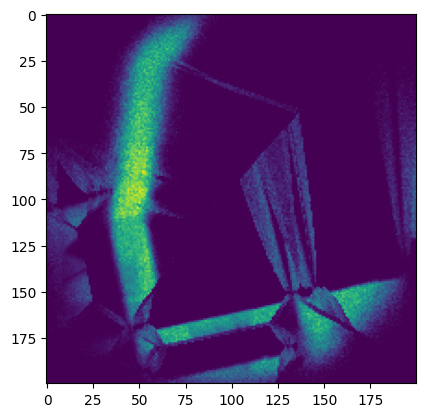

In [20]:
import matplotlib.pyplot as plt
from numpy import eye
from promis import ProMis
from promis.geo import LocationType, PolarLocation, CartesianLocation

# ProMis Parameters
dimensions = (1024.0, 1024.0)  # Meters
resolution = (200, 200)        # Pixels
spatial_samples = 10          # How many maps to generate to compute statistics
model = "Rails"                 # Hybrid ProbLog to be used
cache = "../output"            # Where to cache computed data
types = [                      # Which types to load and compute relations for
    LocationType.PRIMARY,
    LocationType.OPERATOR,
]
tu_darmstadt = PolarLocation(latitude=49.87634, longitude=8.647961)

# Setup engine and compute distributional clauses
pmd = ProMis(tu_darmstadt, dimensions, resolution, types, spatial_samples)

# Set parameters that are unrelated to the loaded map data
# Here, we imagine the operator to be situated at the center of the mission area
pmd.add_feature(CartesianLocation(0.0, 0.0, location_type=LocationType.OPERATOR))

# Compute distributional clauses with uncertainty
pmd.compute_distributions(30 * eye(2), cache)

# Generate landscape
with open(f"../models/{model}.pl", "r") as model_file:
    landscape, program_time, compile_time, inference_time = pmd.generate(logic=model_file.read(), n_jobs=8)

# Show result
print(f"Generated Probabilistic Mission Landscape.")
print(f">> Building the program took {program_time}s.")
print(f">> Compilation took {compile_time}s.")
print(f">> Inference took {inference_time}s.")
plt.imshow(landscape.data.T)

## Parameter Inspection

After running the ProMis engine once as above, the estimated parameters have been stored on disk as `pkl` files.
We can now check them out individually, access the raw data or export in different formats.

In [1]:
from pickle import load

with open('../output/distance_east_1024.0_1024.0_200_200_49.87634_8.64796100000001_10_primary.pkl', 'rb') as pickle:
    primary_distance_east = load(pickle)

eastward_primary = (primary_distance_east > 5) * (primary_distance_east < 100)
eastward_primary.save_as_image("../output/eastward_primary.png")
eastward_primary.save_as_csv("../output/eastward_primary.csv")
print(eastward_primary.data)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.44328993e-015
  3.33066907e-016 1.11022302e-016]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 7.48694637e-212
  4.06705851e-209 2.11992134e-206]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.64772746e-224
  1.07991805e-221 6.79139174e-219]
 [0.00000000e+000 0.00000000e+000 4.99426207e-003 ... 1.54480486e-237
  1.22155601e-234 9.26861236e-232]]


In [2]:
from pickle import load

with open('../output/between_1024.0_1024.0_200_200_49.87634_8.64796100000001_10_primary.pkl', 'rb') as pickle:
    between_primary = load(pickle)

between_primary.probability.save_as_image("../output/between_primary.png")
between_primary.probability.save_as_csv("../output/between_primary.csv")
print(between_primary.probability.data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00153846 0.00153846 0.00095238]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1        0.         0.        ]]
